## Eleven Cities Skating Tour

The datafile contains the average temperature over the coldest period of 15 days.


Demonstration: 
    1. Linear Model
    2. Parameter fit
    3. Evidence to find the best model.
    4. Confidence region for the fit

Author: Do Kester


import classes

In [28]:
import numpy as numpy
import math

from astropy.io import ascii
from PolynomialModel import PolynomialModel
from ExpModel import ExpModel
from SplinesModel import SplinesModel

from Fitter import Fitter
from LevenbergMarquardtFitter import LevenbergMarquardtFitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt


Read the data. We rescale the data to get "nice" numbers, i.e. the year in year-since-2000.


In [29]:
tbl = ascii.read( "data/ElfStedenIJs.csv" )
year = tbl['col1'].data
temp = tbl['col2'].data
tour = tbl['col4'].data
year -= 2000
#print( temp )
#print( tour )


Define the model

In [30]:
mdl = PolynomialModel( 0 )
print( mdl )


Polynomial: f( x:p ) = p_0


define the fitter: Fitter

In [40]:
fitter = Fitter( year, mdl )
 
# find the parameters
param = fitter.fit( temp )
param = Fitter( year, PolynomialModel( 1 ) ).fit( temp )
  

In [41]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [   -1.571    0.009]
StDevs     :     0.255
Scale      :     2.720
Evidence   :  -123.637
Covar matrix :
    0.065


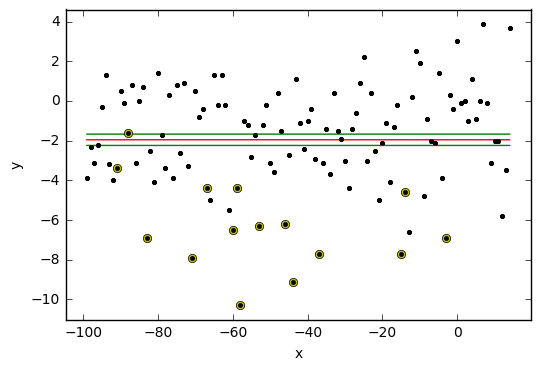

In [39]:
plotFit( year, temp, mdl, ftr=fitter, show=False )
plt.plot( year, tour, 'yo')
plt.plot( year, temp, 'k.')
plt.show()


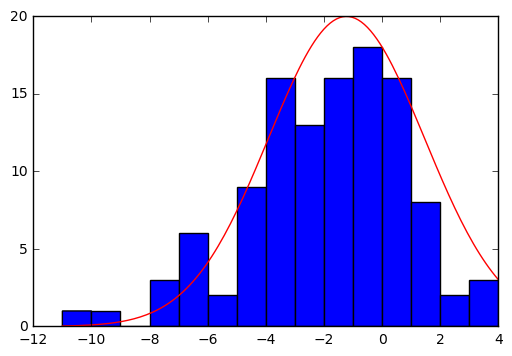

In [19]:
x = numpy.linspace( -11, 4, 141, dtype=float )
plt.hist( temp, 15, (-11,4))
xp = ( x - param[0] ) / fitter.scale
y = numpy.exp( -0.5 * xp * xp )
y *= 20 / numpy.max( y )
plt.plot( x, y, 'r-' )
plt.show()

Try higher order polynomials to see which one is best.

Parameters : [   -1.957    0.001    0.130]
StDevs     : [    0.301    0.716  106.190]
Scale      :     2.744
Evidence   :  -124.060
Covar matrix :
[[    0.091   -0.104   12.647]
 [   -0.104    0.513  -72.062]
 [   12.647  -72.062 11276.304]]


/Users/do/PYTHON/bayesfit/ExpModel.py:94: RuntimeWarning: overflow encountered in exp
  return numpy.multiply( numpy.exp( numpy.multiply( params[1], xdata ) ), params[0] )
/Users/do/PYTHON/bayesfit/BaseFitter.py:652: RuntimeWarning: overflow encountered in square
  res2 = numpy.square( ydata - self.model.result( self.xdata, params ) )


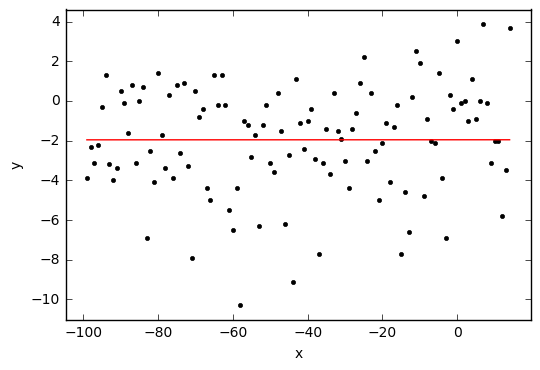

In [23]:
mdl = PolynomialModel( 0 )
mdl += ExpModel()
mdl.parameters = [-2.0, 1.0, 1.0]

fitter = LevenbergMarquardtFitter( year, mdl )
param = fitter.fit( temp )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

plotFit( year, temp, mdl )




The logEvidence increased by 0.8 (=27.67-26.87). So the linear model is bettter by a factor 10^0.8 = 6.31.  

Parameters : [   -3.511   -0.019    0.040]
StDevs     : [    1.088    0.016    0.018]
Scale      :     2.683
Evidence   :  -127.975
Covar matrix :
[[    1.183    0.017   -0.014]
 [    0.017    0.000   -0.000]
 [   -0.014   -0.000    0.000]]


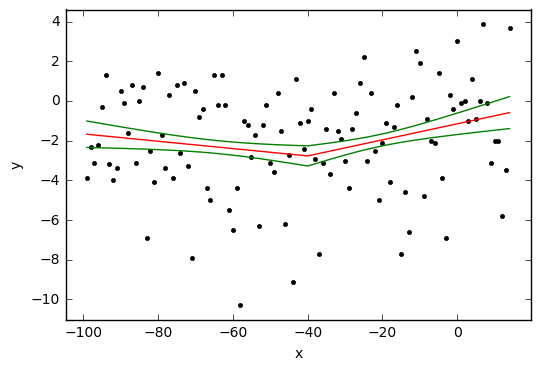

In [27]:
mdl = SplinesModel( knots=[-100,-40,20], order=1 )

fitter = Fitter( year, mdl )
param = fitter.fit( temp )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

plotFit( year, temp, mdl, ftr=fitter )

The logEvidence has gone down again. So this quadratic model is not better than the linear one.